# Exploratory data analysis
In this notebook, we will perform an extensive exploratory data analysis (EDA) in order to get more insight into the data. This will be useful for more elaborate preprocessing.

### Table of contents
* [Load data](#load)
* [First data inspection](#inspection)
* [Faulty data](#faulty)
* [Missing data](#missing)
* [Categorical variables](#categorical)
* [Distributions](#distributions)
* [Quantitative relationships & feature importance](#quantitative)
* [Qualitative relationships](#qualitative)
* [Outliers](#outliers)
* [Clusters](#clusters)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from typing import Dict, List, Any, Set, Optional

# display full dataframes:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

train_data_file = "../data/train.csv"
target_col = "SalePrice"

## Load data <a class="anchor"  id="load"></a>
To prevent any biased decisions, the EDA is performed only on the training set. Thus, only the training data is loaded.

In [2]:
train_df = pd.read_csv(train_data_file)
train_df.set_index("Id", inplace=True)
y_train = train_df[target_col]
X_train = train_df.drop(columns=[target_col])

## First data inspection <a class="anchor"  id="inspection"></a>
**Questions: What is the size of data? What does the data look like? What are the variable data types?**

In [3]:
print(f"Size of training data: {train_df.shape}")

Size of training data: (1460, 80)


In [4]:
train_df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal,124000
838,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,158.0,TA,TA,CBlock,TA,TA,No,BLQ,330,Unf,0,153,483,GasA,TA,Y,SBrkr,483,504,0,987,1,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,100000
570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,943,Unf,0,0,943,GasA,TA,Y,SBrkr,943,0,0,943,1,0,1,0,2,1,TA,4,Typ,2,TA,Detchd,1979.0,Unf,2,600,TA,TA,Y,42,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
361,85,RL,NaN,7540,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,6,6,1978,1978,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,773,Unf,0,115,888,GasA,Ex,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1978.0,RFn,2,470,TA,TA,Y,0,0,0,0,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,156000
1298,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000


In [5]:
# distribution of data types:
X_train.dtypes.value_counts()

object     43
int64      33
float64     3
Name: count, dtype: int64

In [6]:
print(f"Data type of target: {y_train.dtype}")

Data type of target: int64


### Findings
The training data has 1460 rows and 80 columns. One of these columns is the target. Consequently, there are 79 feature columns where 43 are categorical, 33 integers and 3 floating point numbers. The target is represented as integer.

## Missing data <a class="anchor"  id="missing"></a>
**Questions: How is missing data represented? How much data is missing? Do missing values actually mean a specific value?**

In [7]:
# check for other representations of missing values than np.nan:
other_nan_rerpresentations = [
    "?",
    "-",
    "",
    " ",
    "None",
    None,
    "nan",
    "NAN",
    "n/a",
    "na",
    "NA",
    "null",
    "NULL",
    "nil",
    "NIL",
    "empty",
]
other_nan_rep_present = X_train.isin(other_nan_rerpresentations).any().any()
print(
    "Is there any other representation for missing values than np.nan?"
    f" {other_nan_rep_present}"
)

Is there any other representation for missing values than np.nan? False


In [8]:
# count missing values:
sum_missing = X_train.isna().sum().sort_values(ascending=False)
sum_missing[sum_missing > 0.0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Looking into the data description, I make the following findings: For the following features, a missing value means that the feature is not available: Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

### Findings
- All missing values seem to be represented by `np.nan`. 
- There are 19 columns with missing values in the training set. The features with the most missing values are PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu and LotFrontage. 
- For all features with missing values except for LotFrontage, GarageYrBlt, MasVnrArea & Electrical, it is stated in the data description that a missing value means that the feature is not available. 
- I assume that for the numerical features (LotFrontage, GarageYrBlt, MasVnrArea), the data description omits to state the meaning of missing values but that it means the same, that is, the corresponding feature is missing. 
- As for the one missing value in the categorical feature named Electrical, I think, this is a truely missing value with no special meaning.
- The categorical features concerning a garage (GarageCond, GarageType, GarageYrBlt, GarageQual, GarageFinish) have the same amount of missing values and thus, are coherent. However, the categorical features concerning a basement (BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual) differ by 1 missing value. So, here is something wrong with the data. This will be checked in the section [Faulty data](#faulty).

### Handling missing values
For the next steps of the EDA, the missing data should already be handled.
- For the categorical features Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, missing values can be replaced by some unique string like "None" for example.
- For the numerical features LotFrontage and MasVnrArea that are measuring a size, a reasonable replacement of missing values would be their lower bound zero.
- For GarageYrBlt (numerical) it is more difficult since it is not measuring a size and has basically no lower bound. One sensible way to handle the corresponding missing values is to set them to some unique constant that is different from all other values this feature takes. Since no garage was built in year zero, this constant can be zero.
- The row with the single missing value of Electrical can be deleted as a whole since it is only one row.

In [9]:
# handling the missing values:
nan_string = "None"
nan_to_string = [
    "Alley",
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "MiscFeature",
]
nan_to_zero = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
nan_delete_row = ["Electrical"]

X_train[nan_to_string] = X_train[nan_to_string].fillna(nan_string)
X_train[nan_to_zero] = X_train[nan_to_zero].fillna(0)
X_train.dropna(axis=0, subset=nan_delete_row, inplace=True)

## Faulty data <a class="anchor"  id="faulty"></a>
**Questions: Are there duplicated rows or columns? Does the feature’s data type make sense? Is a numerical feature actually categorical or vice versa? Do all values of one feature have the same data type? Are all values in the expected range? If multiple features are connected, is there any inconsistency?**

### Duplicates
There are no duplicated columns but 2 pairs of duplicated rows. However, in both cases, one duplicate is in the train data and the other in the test data. This may be done on purpose when the data split was performed and is most probably leading to a better predictive performance. So, I won't remove this data from the training set.

In [10]:
print(f"Are there any duplicated rows? {X_train.duplicated().any()}")
print(f"Are there any duplicated columns? {X_train.transpose().duplicated().any()}")

Are there any duplicated rows? False
Are there any duplicated columns? False


### Data types

In [11]:
# original data types of all the columns:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


Looking into the data description, I make the following findings:
- MSSubClass is represented as integer but should be a categorical that has no order. Convert this to string data type.
- OverallQual, OverallCond are represented as integer but are actually ordered categoricals (string). Since the integers are already a good encoding, they don't need to be changed.
- LotArea, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice are represented as integers but are actually continuous. Convert these to float data type.
- GarageYrBlt is represented as float but is actually integer. Convert this to integer (only possible after handling missing data because otherwise, it contains np.nan values).

In [12]:
def is_datatype_consistent_in_column(df: pd.DataFrame, col: str) -> bool:
    is_consistent = (df[col].map(type) == df[col].map(type).iloc[0]).all()
    return is_consistent


consistent_cols = []
inconsistent_cols = []
for col in X_train.columns:
    is_consistent = is_datatype_consistent_in_column(df=X_train, col=col)
    if is_consistent:
        consistent_cols.append(col)
    else:
        inconsistent_cols.append(col)
print(
    f"Columns with consistent data types: {consistent_cols}\nColumns with inconsistent"
    f" data types: {inconsistent_cols}"
)

Columns with consistent data types: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Scre

### Value range

In [13]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,57.612748,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627
std,42.310746,34.673850,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,42.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,63.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [14]:
X_train.describe(include=["object"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1150,1453,1368,924,1310,1458,1051,1381,225,1259,1444,1219,726,1140,1433,514,503,871,905,1281,646,649,1310,952,429,1255,1427,741,1364,1334,735,1359,689,870,605,1310,1325,1339,1452,1178,1405,1266,1197


Comparing the data description with the range (min and max) for numerical features and with the number of unique values for categorical values, I make the following findings:
- The value ranges of all numerical features seem to be reasonable. For example, there are no negative values for size variables.
- OverallCond only takes 9 out of 10 values since the maximum of 10 is never reached.
- MSZoning only takes 5 out of 7 possible values. Utilities only takes 2 out of 4 possible values. Condition2 only takes 8 out of 9 possible values. Exterior1st only takes 15 out of 17 possible values. Exterior2nd only takes 16 out of 17 possible values. MasVnrType only takes 4 out of 5 values. ExterQual only takes 4 out of 5 possible values. BsmtQual & BsmtCond only takes 5 out of 6 values. KitchenQual only takes 4 out of 5 possible values. Functional only takes 7 out of 8 possible values. PoolQC only takes 4 out of 5 possible values. MiscFeature only takes 5 out of 6 possible values. SaleType only takes 9 out of 10 possible values.

### Inconsistency of related features

Looking into the data description, I find the following related features:
- Feature that are related via the condition whether a specific attribute exists:
    - MasVnrType, MasVnrArea
    - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
    - Fireplaces, FireplaceQu
    - GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond
    - PoolArea, PoolQC
    - MiscFeature, MiscVal
- Features connected by a timeline:
    - YearBuilt, YearRemodAdd, YrSold
- Multiple features of the same kind:
    - Condition1, Condition2
    - Exterior1st, Exterior2nd
- Features holding shared information:
    - MSSubClass, BldgType, HouseStyle, YearBuilt

#### Features related via condition whether an attribute exists

In [15]:
def get_inconsistent_indexes_of_related_columns(
    df: pd.DataFrame,
    direct_relations: Dict[Any, List[str]],
    implied_relations: Optional[Dict[Any, List[str]]] = None,
) -> Set[int]:
    # 1) direct relations:
    # if one of the direct related cols has its expected value, then all must have their
    # expected value
    # - determine involved indexes:
    direct_rel_indexes = []
    # direct relations:
    for expected_value, cols in direct_relations.items():
        for col in cols:
            direct_rel_indexes.append(set(df[df[col] == expected_value].index))
    # - determine inconsistent indexes:
    direct_rel_union = set().union(*direct_rel_indexes)
    direct_rel_intersection = direct_rel_indexes[0].intersection(
        *direct_rel_indexes[1:]
    )
    inconsistent_indexes = direct_rel_union.difference(direct_rel_intersection)

    # 2) implied relations:
    # if one of the direct related cols has its expected value, then all implied cols
    # must have their expected value
    # - determine involved indexes:
    if implied_relations:
        implied_rel_indexes = []
        for expected_value, cols in implied_relations.items():
            for col in cols:
                implied_rel_indexes.append(set(df[df[col] == expected_value].index))
        # - determine inconsistent indexes:
        implied_rel_differences = [
            direct_rel_intersection - s for s in implied_rel_indexes
        ]
        inconsistent_implied_rel_indexes = set().union(*implied_rel_differences)
        inconsistent_indexes = inconsistent_indexes.union(
            inconsistent_implied_rel_indexes
        )

    return inconsistent_indexes

In [16]:
inconsistent_indexes_masvnr = get_inconsistent_indexes_of_related_columns(
    df=X_train, direct_relations={nan_string: ["MasVnrType"], 0: ["MasVnrArea"]}
)
print(
    "Incosistent indexes for the masonry veneer features:"
    f" {inconsistent_indexes_masvnr}"
)

inconsistent_indexes_bsmt = get_inconsistent_indexes_of_related_columns(
    df=X_train,
    direct_relations={
        nan_string: [
            "BsmtQual",
            "BsmtCond",
            "BsmtExposure",
            "BsmtFinType1",
        ],
        0: ["TotalBsmtSF"],
    },
    implied_relations={
        0: ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"],
        nan_string: ["BsmtFinType2"],
    },
)
print(f"Incosistent indexes for the basement features: {inconsistent_indexes_bsmt}")

inconsistent_indexes_fire = get_inconsistent_indexes_of_related_columns(
    df=X_train, direct_relations={nan_string: ["FireplaceQu"], 0: ["Fireplaces"]}
)
print(f"Incosistent indexes for the fireplace features: {inconsistent_indexes_fire}")

inconsistent_indexes_garage = get_inconsistent_indexes_of_related_columns(
    df=X_train,
    direct_relations={
        nan_string: ["GarageType", "GarageFinish", "GarageQual", "GarageCond"],
        0: ["GarageCars", "GarageArea"],
    },
)
print(f"Incosistent indexes for the garage features: {inconsistent_indexes_garage}")

inconsistent_indexes_pool = get_inconsistent_indexes_of_related_columns(
    df=X_train, direct_relations={nan_string: ["PoolQC"], 0: ["PoolArea"]}
)
print(f"Incosistent indexes for the pool features: {inconsistent_indexes_pool}")

inconsistent_indexes_misc = get_inconsistent_indexes_of_related_columns(
    df=X_train, direct_relations={nan_string: ["MiscFeature"], 0: ["MiscVal"]}
)
print(
    f"Incosistent indexes for the miscellaneous features: {inconsistent_indexes_misc}"
)

Incosistent indexes for the masonry veneer features: {774, 1231, 625, 689, 1301, 1335, 1242}
Incosistent indexes for the basement features: {949}
Incosistent indexes for the fireplace features: set()
Incosistent indexes for the garage features: set()
Incosistent indexes for the pool features: set()
Incosistent indexes for the miscellaneous features: {1201, 874}


In [17]:
# check out some inconsistent rows:
X_train.loc[
    list(inconsistent_indexes_bsmt),
    [
        "BsmtQual",
        "BsmtCond",
        "BsmtExposure",
        "BsmtFinType1",
        "BsmtFinSF1",
        "BsmtFinType2",
        "BsmtFinSF2",
        "BsmtUnfSF",
        "TotalBsmtSF",
        "BsmtFullBath",
        "BsmtHalfBath",
    ],
]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
949,Gd,TA,None,Unf,0,Unf,0,936,936,0,0


#### Features connected by a timeline

In [18]:
def get_inconsistent_indexes_for_timeline(
    df: pd.DataFrame, timeline: List[str]
) -> Set[int]:
    inconsistent_indexes = set()
    for i in range(len(timeline) - 1):
        inconsistent_indexes = inconsistent_indexes.union(
            set(df.loc[df[timeline[i]] > df[timeline[i + 1]]].index)
        )
    return inconsistent_indexes


inconsistent_indexes_time = get_inconsistent_indexes_for_timeline(
    df=X_train, timeline=["YearBuilt", "YearRemodAdd", "YrSold"]
)
X_train.loc[list(inconsistent_indexes_time), ["YearBuilt", "YearRemodAdd", "YrSold"]]

,YearBuilt,YearRemodAdd,YrSold
Id,,,
524,2007,2008,2007


#### Features holding shared information:

In [19]:
# add column containing the string information of MSSubclass:
# note: I use the same terms as contained in HouseStyle and BldgType
MSSubClass_mapping = {
    20: "1Story 1946+",
    30: "1Story 1945-",
    40: "1Story FINISHED ATTIC",
    45: "1.5Unf",
    50: "1.5Fin",
    60: "2Story 1946+",
    70: "2Story 1945-",
    75: "2.5Fin OR 2.5Unf",
    80: "SLvl OR MULTI-LEVEL",
    85: "SFoyer",
    90: "Duplex",
    120: "1Story PUD 1946+",
    150: "1.5Story PUD",
    160: "2Story PUD 1946+",
    180: "PUD MULTILEVEL INCL SLvl SFoyer",
    190: "2fmCon",
}
X_train["MSSubClass_str"] = X_train["MSSubClass"].map(MSSubClass_mapping)

In [20]:
def check_inconsistency(
    row: pd.Series, comprising_col: str, cols_values: Dict[str, List[str]]
) -> bool:
    comprising_value = row[comprising_col]
    for col, unique_values in cols_values.items():
        col_value = row[col]
        if any(value in comprising_value for value in unique_values) and (
            col_value not in comprising_value
        ):
            return False
    return True


is_consistent = X_train.apply(
    lambda row: check_inconsistency(
        row,
        comprising_col="MSSubClass_str",
        cols_values={
            "BldgType": list(X_train["BldgType"].unique()),
            "HouseStyle": list(X_train["HouseStyle"].unique()),
        },
    ),
    axis=1,
)
inconsistent_indexes_mssubclass = list(is_consistent.index[~is_consistent])
inconsistent_indexes_mssubclass

[75, 80, 198, 544, 608, 730, 945, 1440, 1441, 1444, 1449]

In [21]:
# check out the inconsistent rows:
X_train.loc[
    inconsistent_indexes_mssubclass, ["MSSubClass_str", "BldgType", "HouseStyle"]
]

,MSSubClass_str,BldgType,HouseStyle
Id,,,
75,1.5Fin,1Fam,2Story
80,1.5Fin,1Fam,2Story
198,2.5Fin OR 2.5Unf,1Fam,2Story
544,1Story PUD 1946+,TwnhsE,SFoyer
608,1Story 1946+,1Fam,2Story
730,1Story 1945-,1Fam,1.5Fin
945,1Story 1946+,1Fam,SLvl
1440,2Story 1946+,1Fam,SLvl
1441,2Story 1945-,1Fam,2.5Fin


#### Multiple features of the same kind:

In [22]:
# note: if condition2 is normal, I expect condition1 also to be normal
X_train.loc[
    (X_train["Condition2"] != "Norm") & (X_train["Condition1"] == "Norm"),
    ["Condition1", "Condition2"],
]

# note: for exterior1st and exterior2nd, I don't have any special rule since they are just equal if there is only one exterior material

,Condition1,Condition2
Id,,


### Findings
- There are no duplicated rows or columns in the training data.
- All columns have a consistent data type. That is, all values in a column have the same type.
- For some columns, the data type should be changed (see above).
- The value ranges of the numerical features seem to be correct. 
- There are 15 (pseudo-)categorical features that never take on 1-2 of the possible values. If the test data will have these values, those data example will be harder to predict.
- There are 10 inconsistent rows concerning the existence of a masonry veneer, basement ans miscellaneous feature:
    - For the one inconsistent basement row, I guess that the column BsmtExposure should be corrected to "No" for "no exposure" instead of "None" for "no basement". Then the row would be consistent.
    - For the remaining inconsistent rows, I cannot guess what would be an appropriate correction since there are only 2 rows involved.
- There is 1 inconsistent row concerning the timeline where the house is remodeled after being sold. Although this is a possible situation, it is a kind of data leakage since the information of the remodeling is available only after the target is determined.
- There are 11 inconsistent rows concerning the MSSubClass.
- Side note: The only relevant information that MSSubClass adds is whether 
    - the attic of a 1Story house is finished
    - the house is a PUD
- Altogether there are 22 inconsistent rows in the training data. This is roughly 1.5%.

## Categorical variables <a class="anchor"  id="categorical"></a>
**Questions: Is there an ordering in the categories? Are there special characters (non ASCII)?**

According to the data description, I expect the following classification into ordered and unordered categorical features:
- **No order**: MSSubClass (note: originally numerical), MSZoning, Street, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition
- **With order**: LotShape, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

In [23]:
non_ascii_present = (
    X_train.select_dtypes(include="object")
    .applymap(lambda text: not text.isascii())
    .any()
    .any()
)
print(
    "Are there any non-ASCII characters contained in the training set?"
    f" {non_ascii_present}"
)

Are there any non-ASCII characters contained in the training set? False


### Findings
- There are 24 unordered and 20 ordered categorical features (see above).
- There are no non-ASCII characters in the training set.

## Distributions <a class="anchor"  id="distributions"></a>
**Questions: Are there inf values? Is the feature continuous or discrete? If discrete: How many distinct values are there? Is the distribution similar to a normal distribution? Is the distribution skewed? Are there particularly rare or frequent values sticking out? Do the features have a similar range? Are the assumptions of the ML algorithm you want to use met?**

In [24]:
inf_present = train_df.select_dtypes(exclude="object").applymap(np.isinf).any().any()
print(f"Are there any inf values contained in the training set? {inf_present}")

Are there any inf values contained in the training set? False


### Features

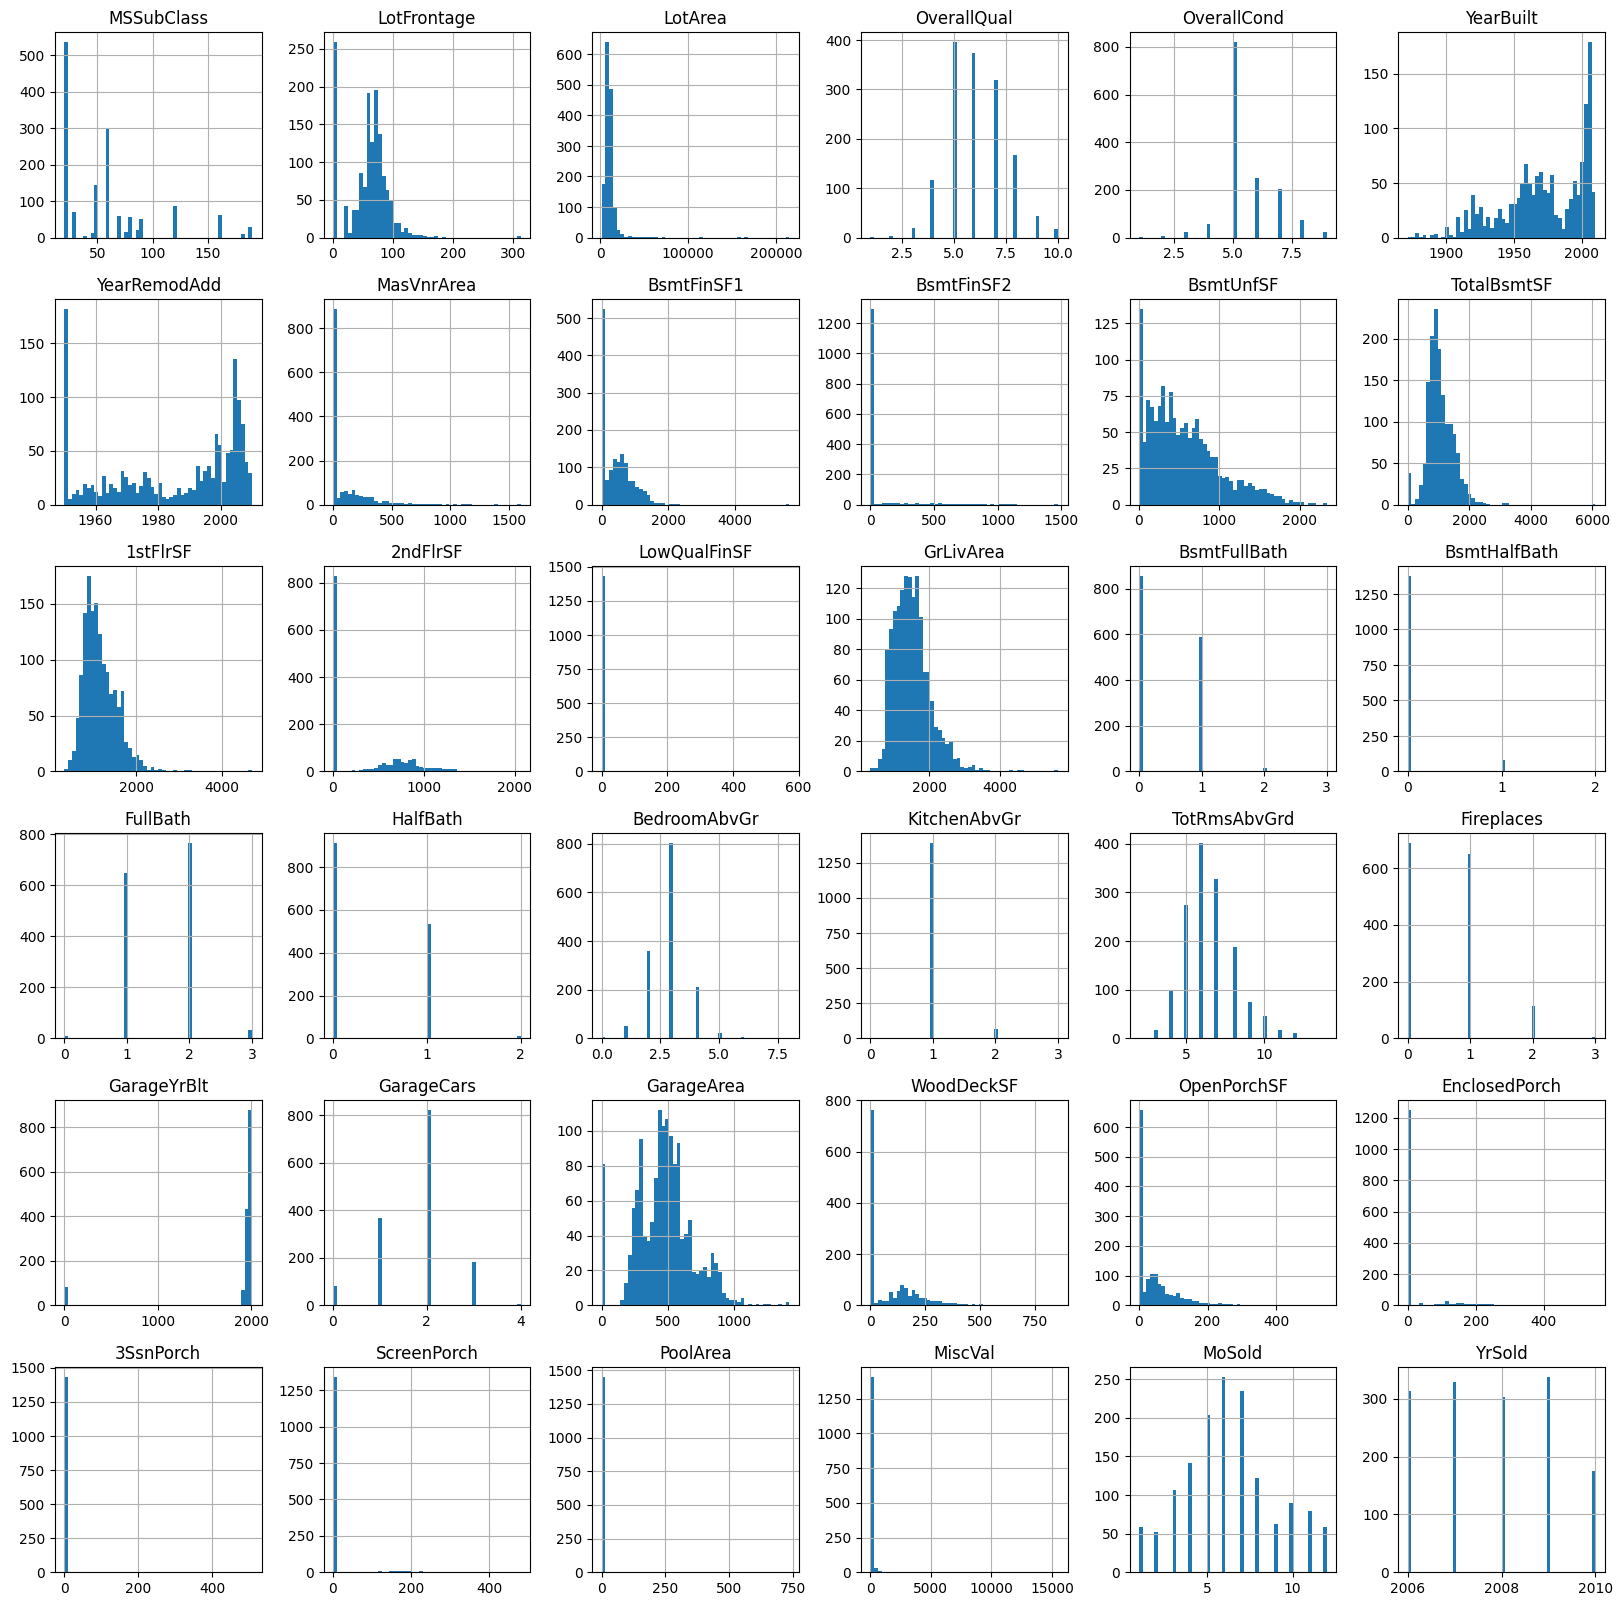

In [25]:
# histograms for numerical features:
X_train.hist(figsize=(20, 20), bins=50)
plt.show()

Findings for the numerical features:
- In the section [Faulty data](#faulty), some numerical features were identified as truely integer and some as truely floating point. This conincides with the classification into discrete (integer) and continuous (float) features since there are no floating point features that have by definition only a countable number of values.
- Most of the distributions seem to be far-off from a normal distribution.
- For the following features, there is one very frequent lower bound value that is sticking out of the distribution: LotFrontage, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, GarageArea, WoodDeckSF, OpenPorchSF, EbclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal. Except for YearRemodAdd where this value is 1950, the lower bound value is always 0. The zero-values are here explained by the fact that the corresponding feature is not existing. For the YearRemodAdd feature, I am not sure whether I can trust this data since it seems to be unlikey that most houses have been remodeled in 1950 but not before.
- Most of the size/area features have very rare high values.
- The numerical features differ greatly in their range. LotArea ranges beyond 200k while most discrete features stay below 10. For machine learning algorithms that are sensitive to scale, a feature scaling is therefore mandatory.

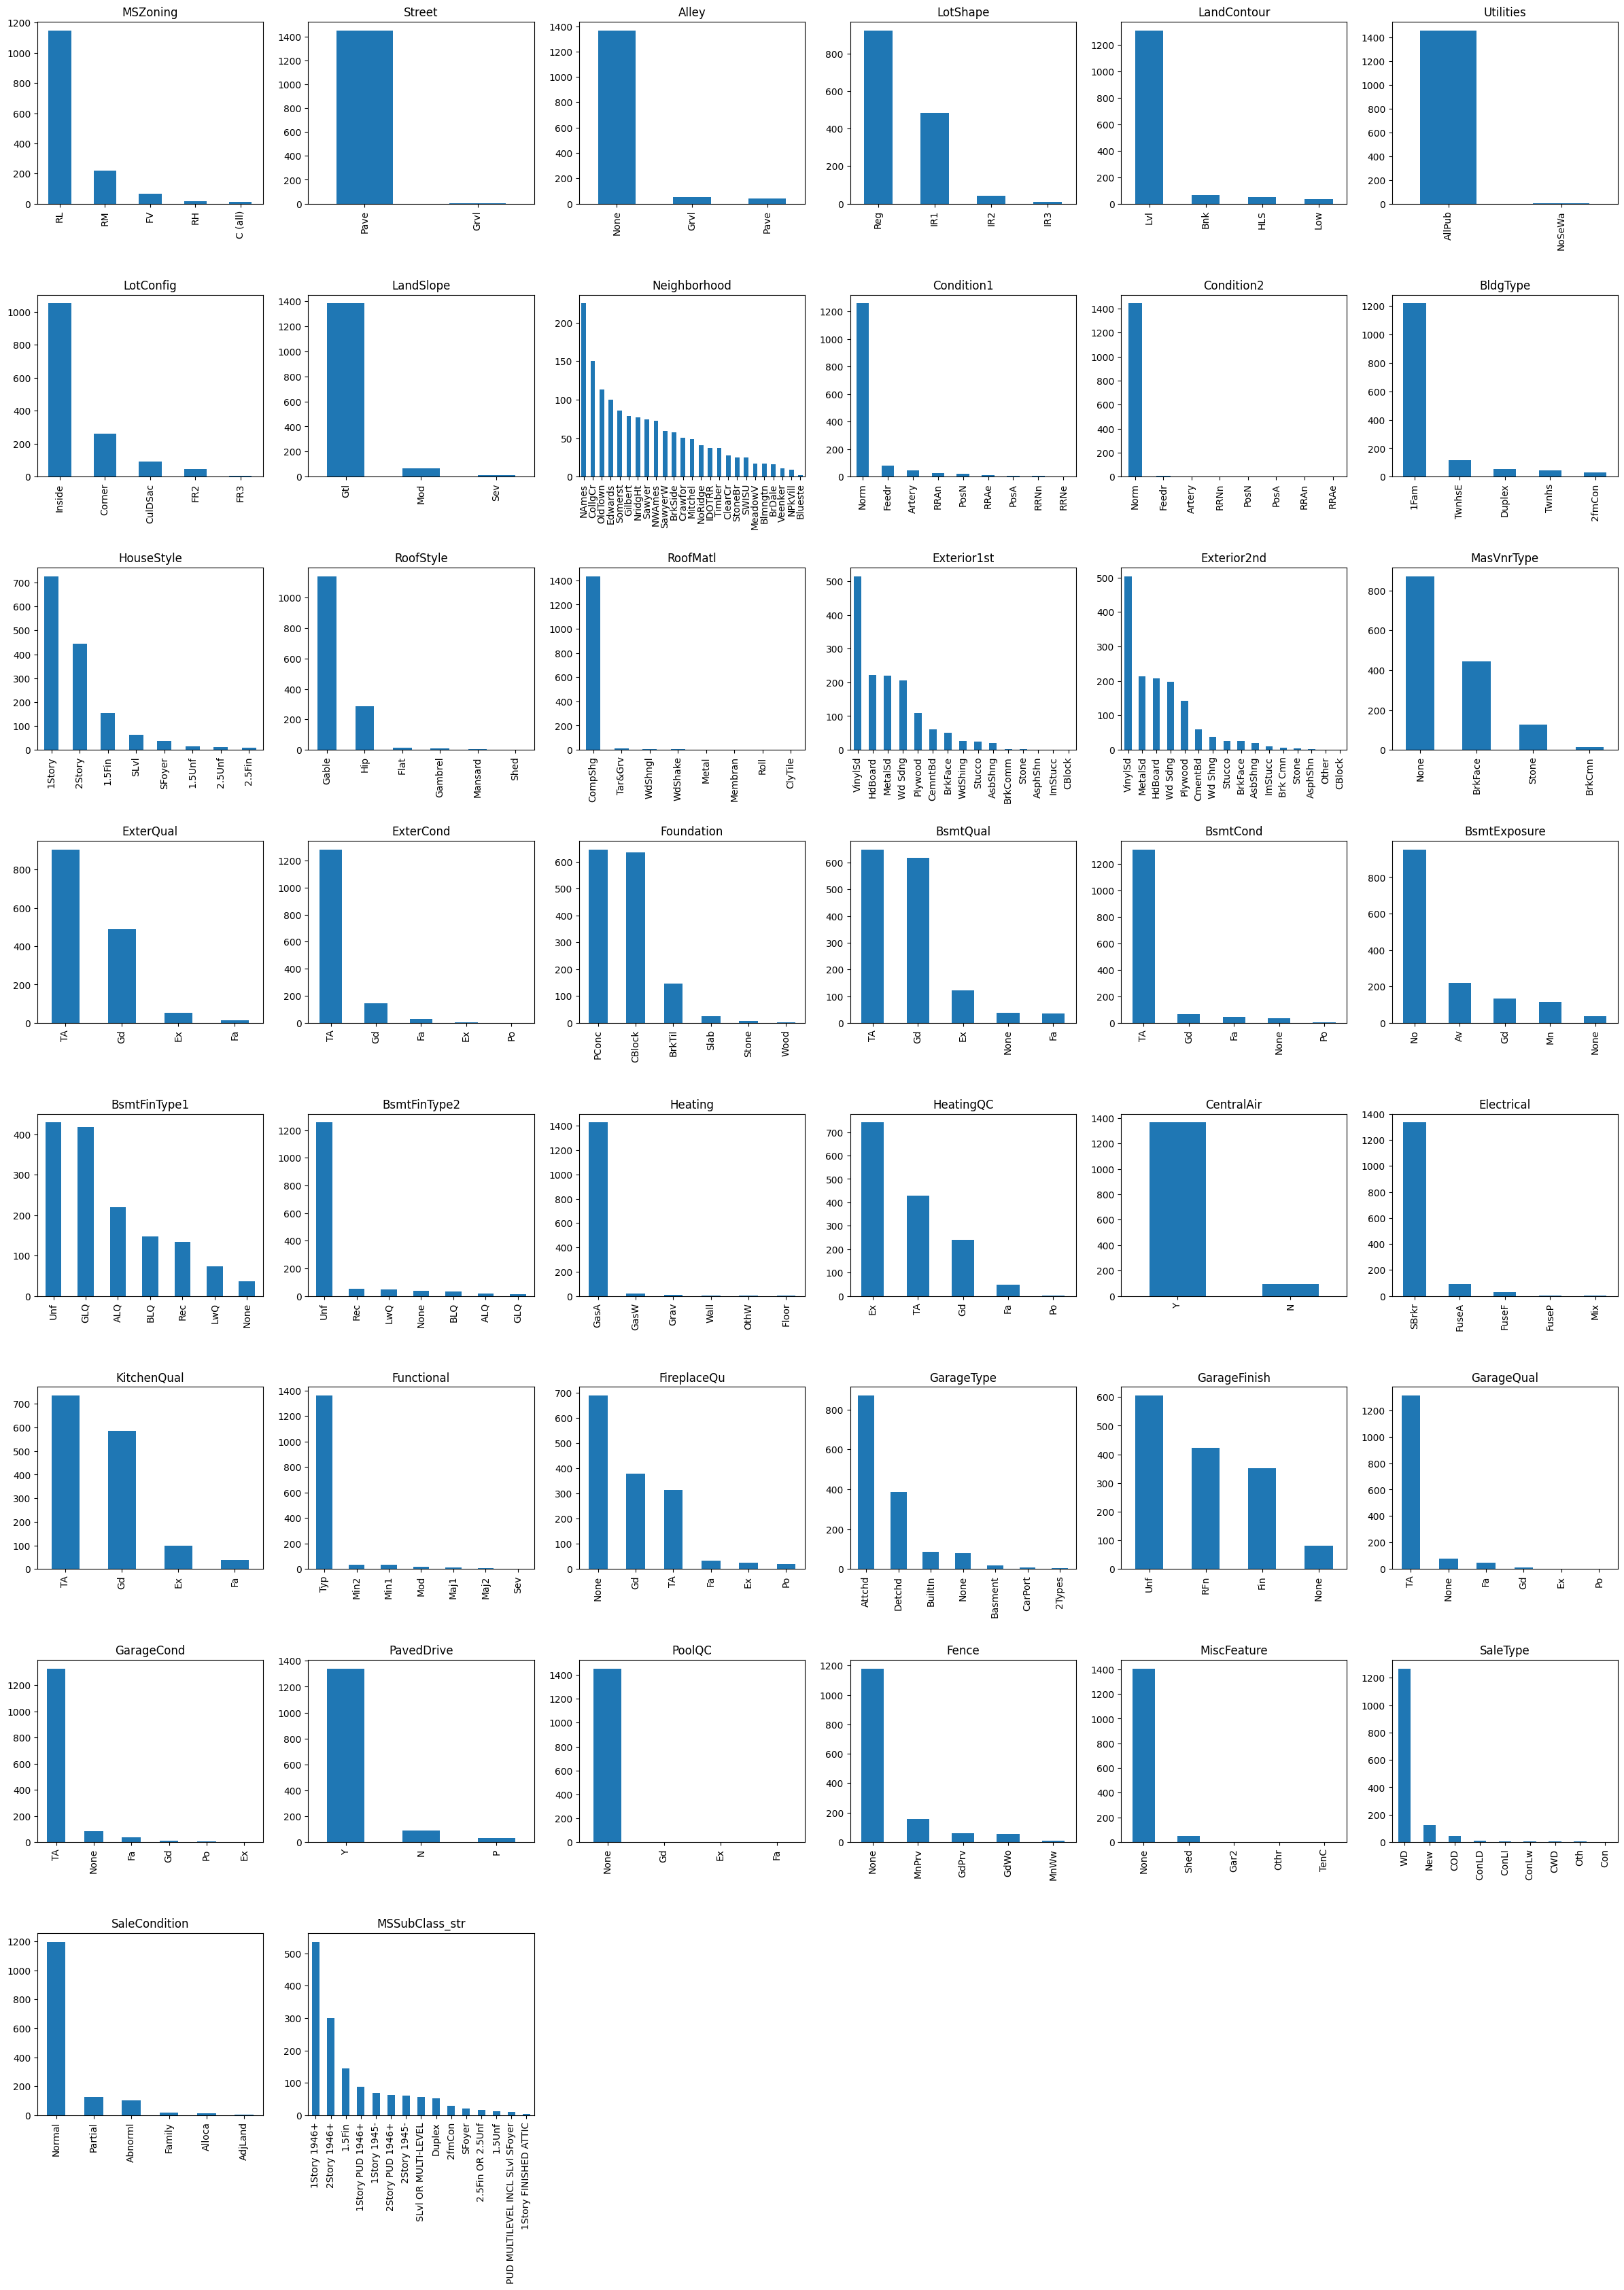

In [26]:
def plot_histograms_for_categoricals(df: pd.DataFrame, subplot_cols: int = 6) -> None:
    categorical_features = df.select_dtypes(include=["object"]).columns

    # calculate number of rows for subplots:
    feature_count = len(categorical_features)
    subplot_rows = (feature_count + subplot_cols - 1) // subplot_cols

    # create subplots:
    fig, axes = plt.subplots(
        nrows=subplot_rows,
        ncols=subplot_cols,
        figsize=(5 * subplot_cols, 5 * subplot_rows),
    )

    # adjust subplot spacing to avoid label overlap:
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

    # plot histograms for all categorical features in subplots:
    for i, feature in enumerate(categorical_features):
        row_index = i // subplot_cols
        col_index = i % subplot_cols
        ax = axes[row_index, col_index]
        X_train[feature].value_counts().plot(kind="bar", ax=ax)
        ax.set_title(feature)
        ax.set(xlabel=None)

    # remove any empty subplots:
    if feature_count % subplot_cols != 0:
        for j in range(feature_count % subplot_cols, subplot_cols):
            fig.delaxes(axes[subplot_rows - 1, j])

    plt.show()


plot_histograms_for_categoricals(df=X_train)

Findings for the categorical features:
- The categorical features take between 2 and 25 distinct values.
- The features with more than 10 distinct values are Neighborhood, Exterior1st, Exterior2nd and MSSubClass (when converted to string). Those features (which have no order) will therefore produce a larger number of columns when being one-hot encoded.
- All categorical features are imbalanced. That is there are categories which are much less frequent than others. Rare categories may be difficult to generalize. One might consider grouping multiple rare categories into one feature "Other".

### Target

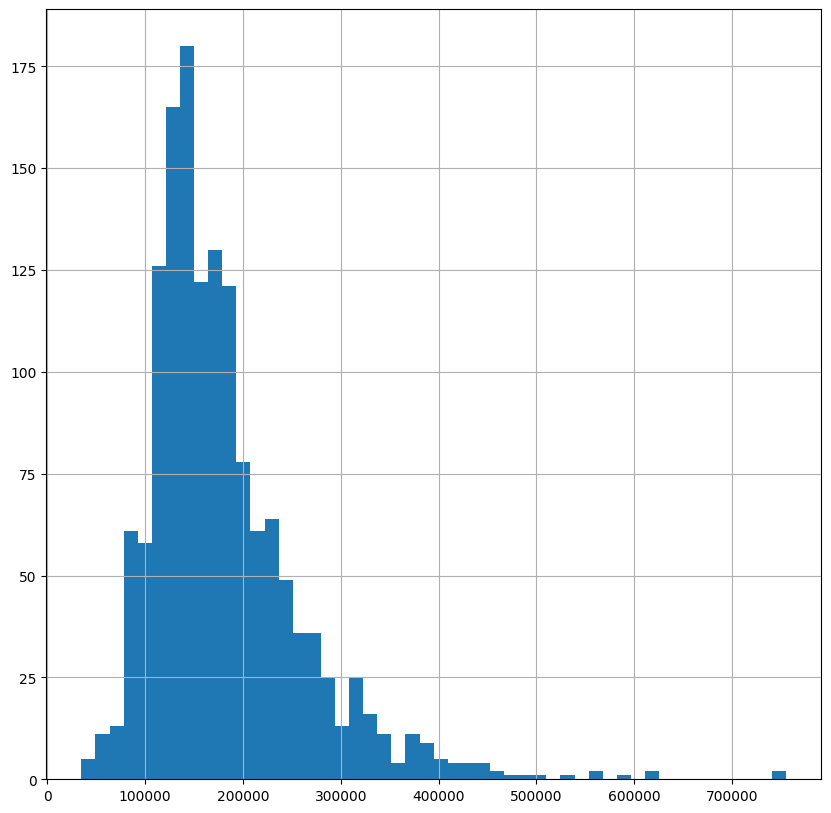

In [27]:
# histogram:
y_train.hist(figsize=(10, 10), bins=50)
plt.show()

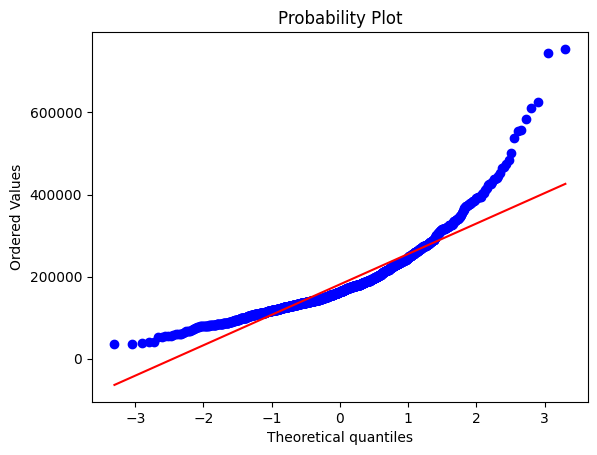

In [28]:
# quantile/quantile plot:
scipy.stats.probplot(y_train, plot=plt)
plt.show()

In [29]:
skeweness = y_train.skew()
excess_kurtosis = y_train.kurt()
print(
    f"Skeweness: {skeweness} (normal distribution has 0)\nExcess kurtosis:"
    f" {excess_kurtosis} (normal distribution has 0)"
)

Skeweness: 1.8828757597682129 (normal distribution has 0)
Excess kurtosis: 6.536281860064529 (normal distribution has 0)


### Findings
- There are no infinite values in the training data.
- The numerical features differ greatly in their scale and are mostly far-off from normal distributions.
- The very frequent value 1950 in the feature YearRemodAff seems to be odd.
- All categorical features are imbalanced with some very rare categories.
- There are 4 (unordered) categorical features with more than 10 categories. 
- The target distribution is heavily positively skewed and highly leptokurtic. It has very few very high values.

## Quantitative relationships & feature importance <a class="anchor"  id="quantitative"></a>
**Questions: Are there collinear variables? Which features are most predictive?**

## Qualitative relationships <a class="anchor"  id="qualitative"></a>
**Questions: Is there a clear relationship of a feature with the target that has not been caught by the quantitative analysis? Is a transformation of a feature helpful with your ML algorithm?**

## Outliers <a class="anchor"  id="outliers"></a>
**Questions: Are there outliers? Are those outliers misleading the prediction?**

## Clusters <a class="anchor"  id="clusters"></a>
**Questions: Are there clear clusters in the data that should be predicted separately?**